In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

**Question 1.** Estimate the covariance matrix of the 4 attributes.

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
def mean(x):
    return sum(x) / len(x)

In [ ]:
def var(arr):
    mu = mean(arr)
    var_ = sum((x - mu) ** 2 for x in arr) / (len(arr) - 1)
    return var_

In [ ]:
def std_dev(arr):
    return var(arr) ** 0.5

In [ ]:
def standardise(x):
    arr = [0] * len(x)
    for i in range(len(x)):
        arr[i] = (x[i] - mean(x)) / std_dev(x)
    return arr

In [ ]:
sepal_length = iris['sepal_length']
sepal_width = iris['sepal_width']
petal_length = iris['petal_length']
petal_width = iris['petal_width']

data = [sepal_length, sepal_width, petal_length, petal_width]
std_data = [standardise(x) for x in data]

In [ ]:
def covariance(x, y):
    mu_x = mean(x)
    mu_y = mean(y)
    val = sum((x[i] - mu_x) * (y[i] - mu_y) for i in range(len(x)))
    return round((val / (len(x) - 1)), 6)

In [ ]:
covariance_matrix = []
for i in std_data:
    row = []
    for j in std_data:
        row.append(covariance(i, j))
    covariance_matrix.append(row)
covariance_matrix = np.array(covariance_matrix)
print(covariance_matrix)

[[ 1.       -0.11757   0.871754  0.817941]
 [-0.11757   1.       -0.42844  -0.366126]
 [ 0.871754 -0.42844   1.        0.962865]
 [ 0.817941 -0.366126  0.962865  1.      ]]


**Question 2.** Estimate the four principal components of the dataset.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_eigenvalues = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_eigenvalues]
eigenvectors = eigenvectors[:, sorted_eigenvalues]
principal_components = eigenvectors[:, 0:4]
print(principal_components)

[[ 0.52106599 -0.3774175  -0.71956572  0.26128805]
 [-0.2693475  -0.9232957   0.24438138 -0.12350995]
 [ 0.58041308 -0.02449184  0.14212457 -0.80144957]
 [ 0.56485646 -0.06694193  0.63427401  0.52359568]]


In [ ]:
principal_components = principal_components.T
print(principal_components)

[[ 0.52106599 -0.2693475   0.58041308  0.56485646]
 [-0.3774175  -0.9232957  -0.02449184 -0.06694193]
 [-0.71956572  0.24438138  0.14212457  0.63427401]
 [ 0.26128805 -0.12350995 -0.80144957  0.52359568]]


**Question 3.** Perform dimensionality reduction using PCA to reduce 150 datapoints into two dimensions and three dimensions.

In [ ]:
k = np.array([principal_components[0], principal_components[1], principal_components[2]])
data_3d = np.dot(k, std_data)
data_3d.shape


(3, 150)

In [ ]:
k = np.array([principal_components[0], principal_components[1]])
data_2d = np.dot(k, std_data)
data_2d.shape

(2, 150)

In [ ]:
print(data_2d)

[[-2.25714118 -2.07401297 -2.35633511 -2.29170678 -2.38186273 -2.06870066
  -2.43586849 -2.22539189 -2.32684531 -2.17703486 -2.15907699 -2.31836415
  -2.21104365 -2.62430901 -2.19139922 -2.25466129 -2.20021681 -2.18303614
  -1.89223284 -2.33554481 -1.90793121 -2.19964388 -2.76508147 -1.81259717
  -2.21972703 -1.94532924 -2.04430279 -2.16133649 -2.13241963 -2.25769799
  -2.13297644 -1.82547923 -2.60621693 -2.43800989 -2.10292983 -2.2004372
  -2.03831762 -2.51889341 -2.42152025 -2.16246624 -2.27884083 -1.85191826
  -2.54511205 -1.95788862 -2.12992363 -2.06283358 -2.3767708  -2.38638172
  -2.22200264 -2.19647502  1.09810249  0.72889555  1.23683585  0.40612257
   1.07188384  0.38738955  0.74403711 -0.48569559  0.92480353  0.01138801
  -0.10982826  0.43922199  0.56023162  0.71715935 -0.03324334  0.87248433
   0.34908216  0.15827985  1.22100327  0.16436731  0.73521951  0.47469696
   1.23005736  0.63074519  0.70031512  0.87135458  1.25231383  1.35386955
   0.66258066 -0.04012412  0.13035853  

In [ ]:
print(data_3d)

[[-2.25714118 -2.07401297 -2.35633511 -2.29170678 -2.38186273 -2.06870066
  -2.43586849 -2.22539189 -2.32684531 -2.17703486 -2.15907699 -2.31836415
  -2.21104365 -2.62430901 -2.19139922 -2.25466129 -2.20021681 -2.18303614
  -1.89223284 -2.33554481 -1.90793121 -2.19964388 -2.76508147 -1.81259717
  -2.21972703 -1.94532924 -2.04430279 -2.16133649 -2.13241963 -2.25769799
  -2.13297644 -1.82547923 -2.60621693 -2.43800989 -2.10292983 -2.2004372
  -2.03831762 -2.51889341 -2.42152025 -2.16246624 -2.27884083 -1.85191826
  -2.54511205 -1.95788862 -2.12992363 -2.06283358 -2.3767708  -2.38638172
  -2.22200264 -2.19647502  1.09810249  0.72889555  1.23683585  0.40612257
   1.07188384  0.38738955  0.74403711 -0.48569559  0.92480353  0.01138801
  -0.10982826  0.43922199  0.56023162  0.71715935 -0.03324334  0.87248433
   0.34908216  0.15827985  1.22100327  0.16436731  0.73521951  0.47469696
   1.23005736  0.63074519  0.70031512  0.87135458  1.25231383  1.35386955
   0.66258066 -0.04012412  0.13035853  

**Question 4.** Visualize the reduced dimension 150 data points in 2D and 3D while giving different colors to reduced data points of different species.

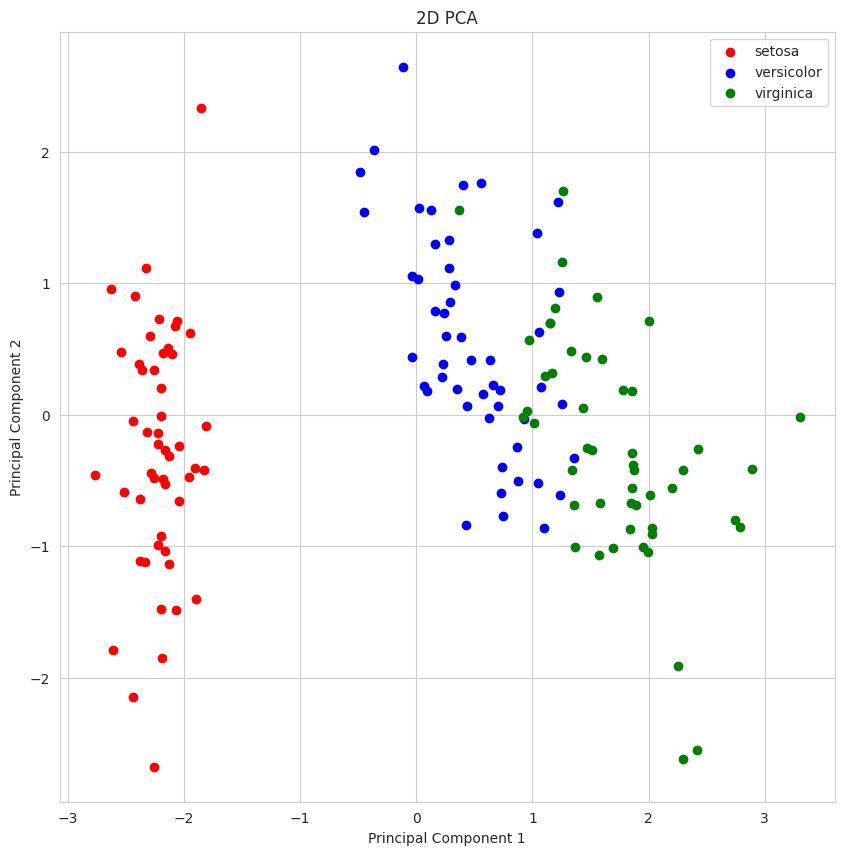

In [ ]:
fig = plt.figure(figsize=(10, 10))

plt.scatter(data_2d[0][:50], data_2d[1][:50], color='red', label='setosa')
plt.scatter(data_2d[0][50:100], data_2d[1][50:100], color='blue', label='versicolor')
plt.scatter(data_2d[0][100:], data_2d[1][100:], color='green', label='virginica')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Dimentionality Reduction')
plt.legend()
plt.show()

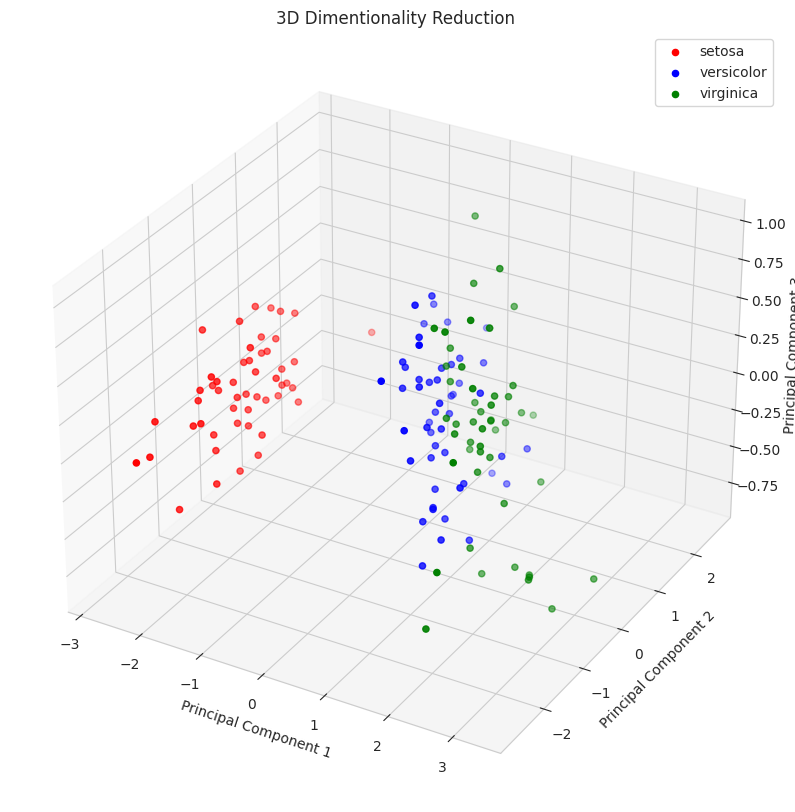

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_3d[0][:50], data_3d[1][:50], data_3d[2][:50], color='red', label='setosa')
ax.scatter(data_3d[0][50:100], data_3d[1][50:100], data_3d[2][50:100], color='blue', label='versicolor')
ax.scatter(data_3d[0][100:], data_3d[1][100:], data_3d[2][100:], color='green', label='virginica')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Dimentionality Reduction')
ax.legend()
plt.show()